## 2.1 株式市場と四本値データ

### 2.1.4 DataFrame，Series，Index

In [1]:
import pandas as pd
# DataFrameに与えるデータを辞書で設定
data={
    'date':pd.period_range('2021-5-30','2021-6-2'),
    'ticker':['A0001','A0002','A0003','A0004'],
    'return':[0.1,0.01,-0.02,0.06]
    }

# 3行3列のDataFrameの生成
df = pd.DataFrame(data)
print(df)
##          date ticker  return
## 0  2021-05-30  A0001    0.10
## 1  2021-05-31  A0002    0.01
## 2  2021-06-01  A0003   -0.02
## 3  2021-06-02  A0004    0.06

# dateを行ラベルに設定する
dfi = df.set_index('date')
print(dfi)
##            ticker  return
## date                     
## 2021-05-30  A0001    0.10
## 2021-05-31  A0002    0.01
## 2021-06-01  A0003   -0.02
## 2021-06-02  A0004    0.06

# 列ラベルを取り出す
print(df.columns)
## Index(['date', 'ticker', 'return'], dtype='object')
print(dfi.columns)
## Index(['ticker', 'return'], dtype='object')

# 行ラベルを取り出す
print(df.index)
## RangeIndex(start=0, stop=4, step=1)
print(dfi.index)
## PeriodIndex(['2021-05-30', '2021-05-31', '2021-06-01'], dtype='period[D]', name='date', freq='D')

# 値を取り出す
print(df.values)
## [[Period('2021-05-30', 'D') 'A0001' 0.1]
##  [Period('2021-05-31', 'D') 'A0002' 0.01]
##  [Period('2021-06-01', 'D') 'A0003' -0.02]
##  [Period('2021-06-02', 'D') 'A0004' 0.06]]
print(dfi.values)
## [['A0001' 0.1]
##  ['A0002' 0.01]
##  ['A0003' 0.06]]

# reuturn列をSeriesとして取り出す
s = dfi['return']
print(s)
## date
## 2021-05-30    0.10
## 2021-05-31    0.01
## 2021-06-01   -0.02
## 2021-06-02    0.06
## Freq: D, Name: return, dtype: float64
print(s.index)
## PeriodIndex(['2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02'], dtype='period[D]', name='date', freq='D')

         date ticker  return
0  2021-05-30  A0001    0.10
1  2021-05-31  A0002    0.01
2  2021-06-01  A0003   -0.02
3  2021-06-02  A0004    0.06
           ticker  return
date                     
2021-05-30  A0001    0.10
2021-05-31  A0002    0.01
2021-06-01  A0003   -0.02
2021-06-02  A0004    0.06
Index(['date', 'ticker', 'return'], dtype='object')
Index(['ticker', 'return'], dtype='object')
RangeIndex(start=0, stop=4, step=1)
PeriodIndex(['2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02'], dtype='period[D]', name='date', freq='D')
[[Period('2021-05-30', 'D') 'A0001' 0.1]
 [Period('2021-05-31', 'D') 'A0002' 0.01]
 [Period('2021-06-01', 'D') 'A0003' -0.02]
 [Period('2021-06-02', 'D') 'A0004' 0.06]]
[['A0001' 0.1]
 ['A0002' 0.01]
 ['A0003' -0.02]
 ['A0004' 0.06]]
date
2021-05-30    0.10
2021-05-31    0.01
2021-06-01   -0.02
2021-06-02    0.06
Freq: D, Name: return, dtype: float64
PeriodIndex(['2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02'], dtype='period[D]', name='date', 

### コード2.1 日次四本値 CSV データの読み込みと表示

In [3]:
# 本節で必要となるライブラリの読み込み
import os
import pandas as pd  # pandasライブラリの読み込み
import mplfinance as mpf

# 出力フォルダの作成(既に存在してもエラーとしない)
os.makedirs('./output', exist_ok=True)

# CSV ファイルを読み込み DataFrame を構成し、stockDaily 変数にセット
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
print(len(stockDaily))  ## 行数: 12006004
print(stockDaily.head(10))  # 先頭 10行を抜き出し表示する


12006004
  ticker        date  open  high   low  close  volume     share    return  \
0  A0001  1991-01-04  1411  1498  1411   1457    1127  19856748 -0.884354   
1  A0001  1991-01-07  1456  1456  1456   1456    1863  19856748 -0.068634   
2  A0001  1991-01-08  1424  1441  1424   1441    8084  19856748 -1.030220   
3  A0001  1991-01-09  1437  1437  1437   1437    7542  19856748 -0.277585   
4  A0001  1991-01-10  1401  1451  1384   1424     986  19856748 -0.904663   
5  A0001  1991-01-11  1420  1444  1366   1389   12547  19856748 -2.457865   
6  A0001  1991-01-14  1474  1474  1474   1474   11266  19856748  6.119511   
7  A0001  1991-01-16  1472  1514  1465   1472    2692  19856748 -0.135685   
8  A0001  1991-01-17  1465  1524  1452   1472       0  19856748  0.000000   
9  A0001  1991-01-18  1469  1469  1469   1469       0  19856748 -0.203804   

  industry  qme qbeme  
0        A  ME1   BM5  
1        A  ME1   BM5  
2        A  ME1   BM5  
3        A  ME1   BM5  
4        A  ME1   BM5  

,ticker,date,open,high,low,close,volume,share,return,industry,qme,qbeme
0,A0001,1991-01-04,1411,1498,1411,1457,1127,19856748,-0.884354,A,ME1,BM5
1,A0001,1991-01-07,1456,1456,1456,1456,1863,19856748,-0.068634,A,ME1,BM5
2,A0001,1991-01-08,1424,1441,1424,1441,8084,19856748,-1.030220,A,ME1,BM5
3,A0001,1991-01-09,1437,1437,1437,1437,7542,19856748,-0.277585,A,ME1,BM5
4,A0001,1991-01-10,1401,1451,1384,1424,986,19856748,-0.904663,A,ME1,BM5
5,A0001,1991-01-11,1420,1444,1366,1389,12547,19856748,-2.457865,A,ME1,BM5
6,A0001,1991-01-14,1474,1474,1474,1474,11266,19856748,6.119511,A,ME1,BM5
7,A0001,1991-01-16,1472,1514,1465,1472,2692,19856748,-0.135685,A,ME1,BM5
8,A0001,1991-01-17,1465,1524,1452,1472,0,19856748,0.000000,A,ME1,BM5
9,A0001,1991-01-18,1469,1469,1469,1469,0,19856748,-0.203804,A,ME1,BM5


### コード2.2 2010 年 1 月 1 日以降の銘柄 A0001 の四本値 + 出来高を選択するコード

In [4]:
# DataFrameに[]で文字列リストを与えると，指定された全ての列名を選択する。
df = stockDaily[['ticker', 'date', 'open', 'high', 'low', 'close', 'volume']]
print(df)
##          ticker       date  open  high   low  close  volume
## 0         A0001 1991-01-04  1411  1498  1411   1457    1127
## 1         A0001 1991-01-07  1456  1456  1456   1456    1863

# 日付とtickerの比較演算により各行についてのTrue/FalseのSeriesを計算し，
# それをDataFrameに[]で与えることによって行を選択している。
df = df[df['date'] >= '2010-01-01']
df = df[df['ticker'] == 'A0001']
print(df)
##      ticker        date  open  high   low  close  volume
## 4676  A0001  2010-01-04  1613  1625  1609   1625   76405
## 4677  A0001  2010-01-05  1592  1645  1580   1640  171606


         ticker        date  open  high   low  close  volume
0         A0001  1991-01-04  1411  1498  1411   1457    1127
1         A0001  1991-01-07  1456  1456  1456   1456    1863
2         A0001  1991-01-08  1424  1441  1424   1441    8084
3         A0001  1991-01-09  1437  1437  1437   1437    7542
4         A0001  1991-01-10  1401  1451  1384   1424     986
...         ...         ...   ...   ...   ...    ...     ...
12005999  Z0137  2014-12-24   645   645   645    645  237742
12006000  Z0137  2014-12-25   640   643   628    643   77924
12006001  Z0137  2014-12-26   649   649   645    645  110739
12006002  Z0137  2014-12-29   635   653   618    631  226144
12006003  Z0137  2014-12-30   644   647   644    647  286380

[12006004 rows x 7 columns]
     ticker        date  open  high   low  close  volume
4676  A0001  2010-01-04  1613  1625  1609   1625   76405
4677  A0001  2010-01-05  1592  1645  1580   1640  171606
4678  A0001  2010-01-06  1654  1745  1610   1679  167524
4679  A0001

### コード2.3 コード 2.2 の 2 つの行選択処理を&演算子で記述したもの

In [5]:
# 上の２つの条件は１行で書くことも可能(条件は括弧で囲わなければエラーとなることに注意する)
df = stockDaily[['ticker', 'date', 'open', 'high', 'low', 'close', 'volume']]
# ２つのbool Seriesを&演算子でAND演算している。
df = df[(df['date'] >= '2010-01-01') & (df['ticker'] == 'A0001')]
print(df)

     ticker        date  open  high   low  close  volume
4676  A0001  2010-01-04  1613  1625  1609   1625   76405
4677  A0001  2010-01-05  1592  1645  1580   1640  171606
4678  A0001  2010-01-06  1654  1745  1610   1679  167524
4679  A0001  2010-01-07  1648  1734  1624   1689  119853
4680  A0001  2010-01-08  1579  1625  1579   1600  215411
...     ...         ...   ...   ...   ...    ...     ...
5898  A0001  2014-12-24  1494  1562  1488   1488   54975
5899  A0001  2014-12-25  1492  1505  1489   1505  344515
5900  A0001  2014-12-26  1498  1533  1498   1533  226367
5901  A0001  2014-12-29  1508  1530  1480   1480   85878
5902  A0001  2014-12-30  1523  1563  1523   1549  345003

[1227 rows x 7 columns]


### コード2.4 日付のみ行ラベルで選択する

In [6]:
# 行ラベルによる選択
df = stockDaily[['ticker', 'date', 'open', 'high', 'low', 'close', 'volume']]
df = df.set_index('date').sort_index()
df = df['2010-01-01':]
df = df[df['ticker'] == 'A0001']
print(df)

           ticker  open  high   low  close  volume
date                                              
2010-01-04  A0001  1613  1625  1609   1625   76405
2010-01-05  A0001  1592  1645  1580   1640  171606
2010-01-06  A0001  1654  1745  1610   1679  167524
2010-01-07  A0001  1648  1734  1624   1689  119853
2010-01-08  A0001  1579  1625  1579   1600  215411
...           ...   ...   ...   ...    ...     ...
2014-12-24  A0001  1494  1562  1488   1488   54975
2014-12-25  A0001  1492  1505  1489   1505  344515
2014-12-26  A0001  1498  1533  1498   1533  226367
2014-12-29  A0001  1508  1530  1480   1480   85878
2014-12-30  A0001  1523  1563  1523   1549  345003

[1227 rows x 6 columns]


### コード2.5 loc[] による選択

In [7]:
# loc[]による選択
df = stockDaily.loc[
    (stockDaily['date'] >= '2010-01-01') & (stockDaily['ticker'] == 'A0001'),
    ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume']]
print(df)

     ticker        date  open  high   low  close  volume
4676  A0001  2010-01-04  1613  1625  1609   1625   76405
4677  A0001  2010-01-05  1592  1645  1580   1640  171606
4678  A0001  2010-01-06  1654  1745  1610   1679  167524
4679  A0001  2010-01-07  1648  1734  1624   1689  119853
4680  A0001  2010-01-08  1579  1625  1579   1600  215411
...     ...         ...   ...   ...   ...    ...     ...
5898  A0001  2014-12-24  1494  1562  1488   1488   54975
5899  A0001  2014-12-25  1492  1505  1489   1505  344515
5900  A0001  2014-12-26  1498  1533  1498   1533  226367
5901  A0001  2014-12-29  1508  1530  1480   1480   85878
5902  A0001  2014-12-30  1523  1563  1523   1549  345003

[1227 rows x 7 columns]


### コード2.6 ローソク足チャートの描画

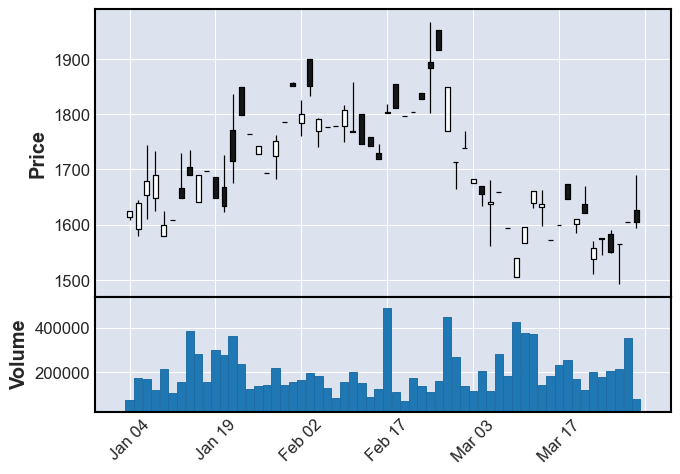

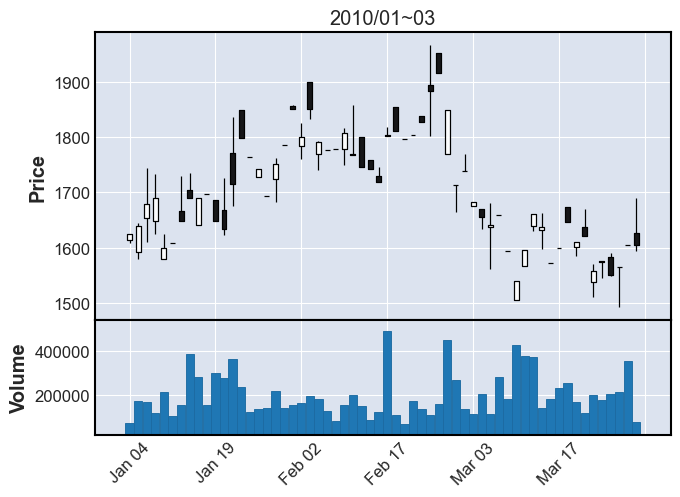

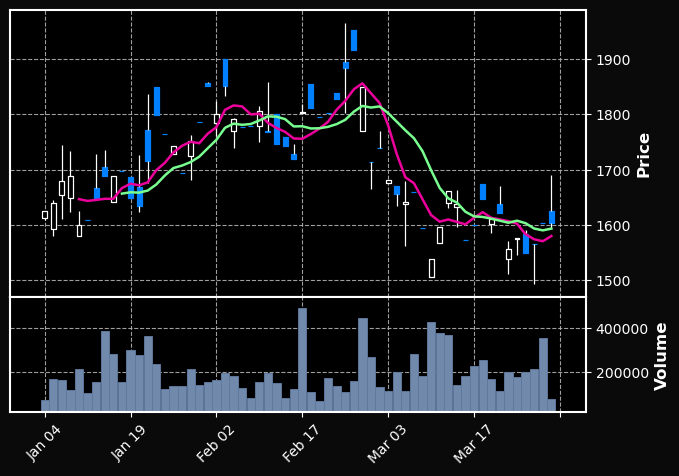

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


In [8]:
df = stockDaily[stockDaily['ticker'] == 'A0001']
# date列はPeriod型なので、DateTime64型に変換して行ラベルに指定
# これはmpf.plot()がPeriod型に対応していないからである。
df.index = df['date'].dt.to_timestamp()
df = df.sort_index()

candle = df.loc['2010-01-01': '2010-03-31',
                ['open', 'high', 'low', 'close', 'volume']]
mpf.plot(candle, type='candle', volume=True)

# savefig=を指定するとpngで保存できる
mpf.plot(candle, type='candle', volume=True, mav=[5, 10],
         savefig='./output/candle.png')

# 列名がデフォルト(openやOpenなど)でない場合はcolumnsで指定する。
candle.columns = ['o', 'h', 'l', 'c', 'v']
mpf.plot(candle, type='candle', volume=True,
         axtitle='2010/01~03', columns=['o', 'h', 'l', 'c', 'v'])

# mavを指定すれば移動平均線を描画できる。
# styleを変更することも可能(classic,mike,defaultなど)。
mpf.plot(candle, type='candle', volume=True,
         mav=[5, 10], style='mike', columns=['o', 'h', 'l', 'c', 'v'])
# typeの一覧を確認する。
print(mpf.available_styles())

### コード2.7 複数のローソク足チャートの描画

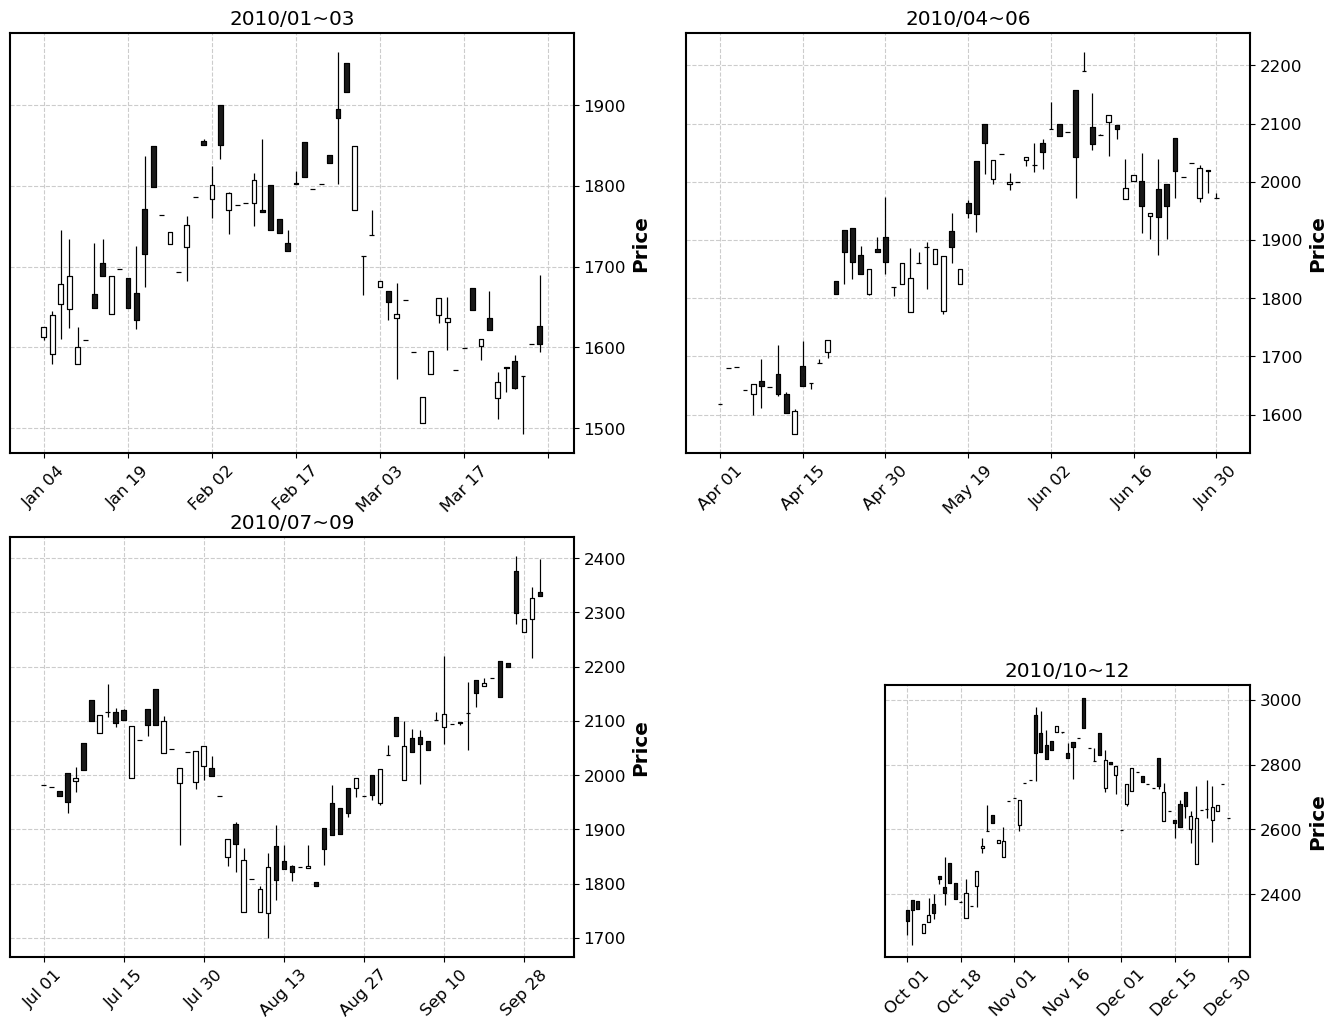

In [9]:
candle = df[['open', 'high', 'low', 'close', 'volume']]
candle1 = candle.loc['2010-01-01':'2010-03-31']
candle2 = candle.loc['2010-04-01':'2010-06-30']
candle3 = candle.loc['2010-07-01':'2010-09-30']
candle4 = candle.loc['2010-10-01':'2010-12-31']

fig = mpf.figure(figsize=(16, 12), style='classic')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(3, 3, 9)
mpf.plot(candle1, type='candle', ax=ax1, axtitle='2010/01~03')
mpf.plot(candle2, type='candle', ax=ax2, axtitle='2010/04~06')
mpf.plot(candle3, type='candle', ax=ax3, axtitle='2010/07~09')
mpf.plot(candle4, type='candle', ax=ax4, axtitle='2010/10~12')
fig.savefig('./output/multi_candle.png')